   # WEEK_12.  

In [283]:
import numpy as npy
import pandas as pan
import matplotlib.pyplot as matplt
import seaborn as sea
from IPython.core.display import display
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [284]:
full_bank = pan.read_csv('bank-full.csv', sep = ';')

In [285]:
full_bank.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [286]:
full_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [287]:
full_bank['default'] = full_bank['default'].astype(object)
full_bank['housing'] = full_bank['housing'].astype(object)
full_bank['loan'] = full_bank['loan'].astype(object)
full_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [288]:
full_bank.shape

(45211, 17)

In [289]:
full_bank.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

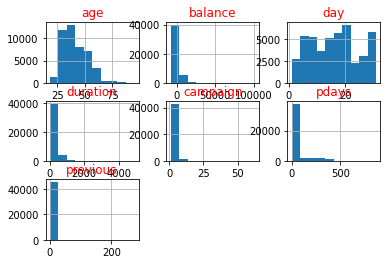

In [290]:
full_bank.hist()

In [291]:
full_bank.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [292]:
full_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [293]:
full_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [294]:
def nullVal(full_bank):
    missing_num = full_bank.isnull().sum()
    missing_percent = (100 * missing_num / len(full_bank))
    concatinated_value = pan.concat([missing_num, missing_percent], axis = 1)

    missing = concatinated_value.rename(columns = {0:"Missing ", 1:"Percent of Missing Values"})
    in_sorted_order = missing[missing.iloc[:,1]!=0].sort_values(by= 'Percent of Missing Values', ascending = False).round(1)
    print("Full Bank Data has a total of '{}' coloumns from which the '{}' coloumns are having missing values.".format(full_bank.shape[1],in_sorted_order.shape[0]))
    return in_sorted_order
missing_num = nullVal(full_bank)

Full Bank Data has a total of '17' coloumns from which the '0' coloumns are having missing values.


<AxesSubplot:>

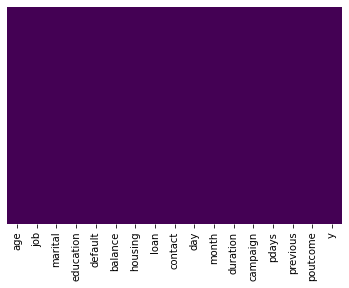

In [295]:
sea.heatmap(full_bank.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Data preprocessing

In [296]:
c = 0;

for col in full_bank:
    if full_bank[col].dtype == 'object':
        if len(list(full_bank[col].unique())) <= 2:
            l = preprocessing.LabelEncoder()
            full_bank[col] = l.fit_transform(full_bank[col])
            c = c + 1;
            print(col)

default
housing
loan
y


In [297]:

full_bank.shape

(45211, 17)

In [298]:
full_bank = pan.get_dummies(full_bank)
full_bank.shape

(45211, 49)

In [299]:
full_bank['housing'].value_counts()


1    25130
0    20081
Name: housing, dtype: int64

In [300]:
full_bank['loan'].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [301]:
full_bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

Writing the method for the Classification report result, and the matrix.

In [302]:


def print_score(classification, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train,classification.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, classification.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, classification.predict(X_train))))

        res = cross_val_score(classification, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(npy.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(npy.std(res)))

    elif train==False:
        print("Test Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_test,classification.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, classification.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,classification.predict(X_test))))

In [303]:
X_train, X_test, y_train, y_test = train_test_split(full_bank.drop('y',axis=1),full_bank['y'],test_size=0.15,random_state=101)

In [304]:
import  gc
#garbage collector
gc.collect()

136

In [305]:
standarScaler = StandardScaler()
X_train = standarScaler.fit_transform(X_train)
X_test = standarScaler.transform(X_test)

In [306]:
smote = SMOTE(random_state=15, sampling_strategy= 1.0)
x_train_right , y_train_right = smote.fit_resample(X_train,y_train)

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

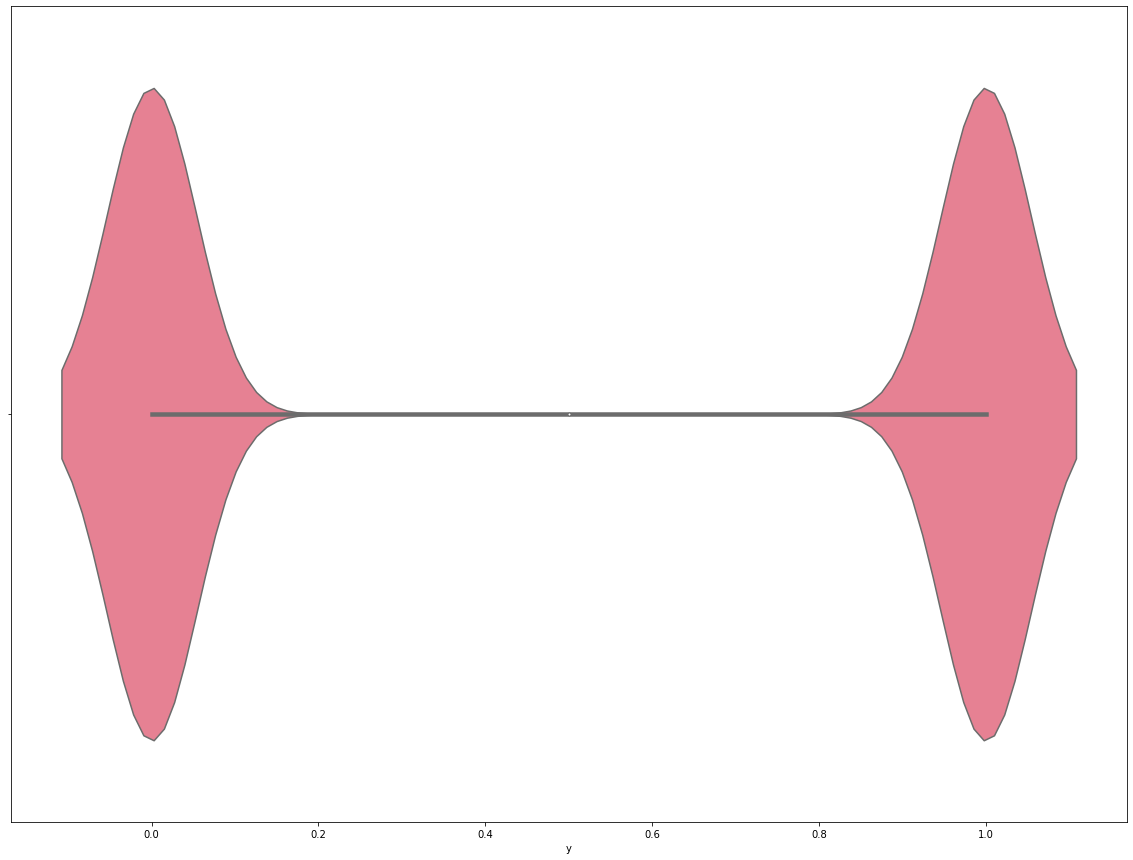

In [307]:
matplt.figure(figsize =(20,15))
sea.violinplot(y_train_right, palette = 'husl')

In [308]:
# let's try different modeling to get another result or best prediction result.

In [309]:
logistic_reg = LogisticRegression( C = 0.0001, random_state=21)
logistic_reg.fit(x_train_right,y_train_right)

LogisticRegression(C=0.0001, random_state=21)

In [310]:
print_score(logistic_reg, x_train_right, y_train_right, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.8367

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84     33954
           1       0.85      0.81      0.83     33954

    accuracy                           0.84     67908
   macro avg       0.84      0.84      0.84     67908
weighted avg       0.84      0.84      0.84     67908


Confusion Matrix: 
 [[29168  4786]
 [ 6302 27652]]

Average Accuracy: 	 0.8357
Accuracy SD: 		 0.0037


In [311]:
#Now let's set train = False, to see the result
print_score(logistic_reg, x_train_right, y_train_right, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8508

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      5968
           1       0.43      0.79      0.56       814

    accuracy                           0.85      6782
   macro avg       0.70      0.82      0.73      6782
weighted avg       0.90      0.85      0.87      6782


Confusion Matrix: 
 [[5128  840]
 [ 172  642]]



In [312]:
# Now we use RandomForestClassifier method to see the recall and precission difference

classification_report_random_forest = RandomForestClassifier(n_estimators=40,random_state=21)
classification_report_random_forest.fit(x_train_right,y_train_right)



RandomForestClassifier(n_estimators=40, random_state=21)

In [313]:
print_score(classification_report_random_forest,x_train_right,y_train_right, X_test,y_test, train= False)

Test Result:

Accuracy score: 0.8972

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      5968
           1       0.58      0.54      0.56       814

    accuracy                           0.90      6782
   macro avg       0.76      0.74      0.75      6782
weighted avg       0.89      0.90      0.90      6782


Confusion Matrix: 
 [[5644  324]
 [ 373  441]]



#Now we will use LightGBM as it was mentioned in the Recommendation part with Kfold cross
#Validation

In [323]:
def kfold_lightGBM(train_df, num_folds, stratified = False):
    print("Starting LightGBM. Train shape: {}".format(train_df.shape))

    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=47)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)

    oof_preds = npy.zeros(train_df.shape[0])

    feature_importance_df = pan.DataFrame()
    feats = [f for f in train_df.columns if f not in ['y']]

    # Splitting the training set into folds for Cross Validation
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['y'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['y'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['y'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,n_estimators=10000,learning_rate=0.02,num_leaves=32,colsample_bytree=0.9497036,subsample=0.8715623,max_depth=8,reg_alpha=0.04,reg_lambda=0.073,min_split_gain=0.0222415,min_child_weight=40,silent=-1,verbose=-1,
        )
        # Fitting the model and evaluating by AUC
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
                eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
        print_score(clf, train_x, train_y, valid_x, valid_y, train=False)
        # Dataframe holding the different features and their importance
        fold_importance_df = pan.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pan.concat([feature_importance_df, fold_importance_df], axis=0)

        # Freeing up memory
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    display_importances(feature_importance_df)
    return feature_importance_df



Starting LightGBM. Train shape: (45211, 49)
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1


/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument i

[1000]	training's auc: 0.955806	training's binary_logloss: 0.169114	valid_1's auc: 0.927529	valid_1's binary_logloss: 0.20478
Test Result:

Accuracy score: 0.9065

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     19988
           1       0.63      0.47      0.54      2618

    accuracy                           0.91     22606
   macro avg       0.78      0.72      0.74     22606
weighted avg       0.90      0.91      0.90     22606


Confusion Matrix: 
 [[19272   716]
 [ 1397  1221]]



/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument i

[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[1000]	training's auc: 0.954669	training's binary_logloss: 0.168889	valid_1's auc: 0.93165	valid_1's binary_logloss: 0.204391
Test Result:

Accuracy score: 0.9054

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     19934
           1       0.63      0.47      0.54      2671

    accuracy                           0.91     22605
   macro avg       0.78      0.72      0.74     22605
weighted avg       0.90      0.91      0.90     22605


Confusion Matrix: 
 [[19211   723]
 [ 1415  1256]]



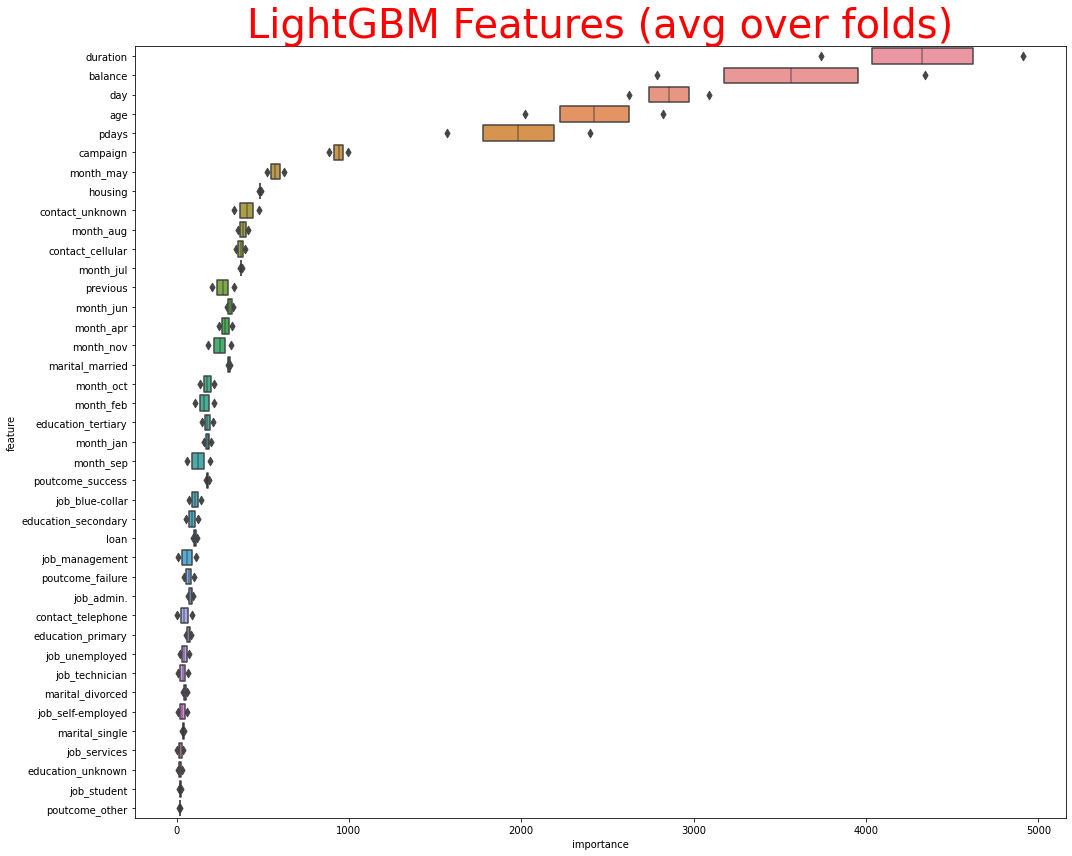

In [325]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    matplt.figure(figsize=(15, 12))
    sea.boxenplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    matplt.title('LightGBM Features Average over folds', fontsize= 40)
    matplt.tight_layout()
    matplt.savefig('lgbm_importances.png')
feat_importance = kfold_lightGBM(full_bank, num_folds= 2, stratified= False)

### Light GBM has best Accuarcy model